# Splitting Resumes For Training Model

## Imports

In [3]:
from pdf2image import convert_from_path 
import easyocr
import numpy as np
import PIL # Python Imaging Library
from PIL import ImageDraw, Image # drawing bounding boxes
import spacy # advanced NLP for key attributes
from IPython.display import display,Image

/Users/daniellichter/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [4]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


## Function Declarations

In [5]:
def createBoxes(bounds):
    categories =['publications','community service','experience','technicallmanagement skills',
             'project experience','activities','awards','summary','volunteer','education',
             'interests','skills','projects','work experience','professional experience','references',
             'volunteer experience','technical skills','research experience','computer skills',
             'leadership & volunteer experience','skillset','extracurriculars', 'certifications', 'certification',
             'academic projects','education & credentials','leadership and extra curriculars',
             'skills & certifications','skill set_','extra curricular activities',
             'leadership , awards & achievements','academic experience','leadership and achievements',
            'education and training','work history','professional summary','skills and abilities',
            'cqurse workand proiects','relevant skills','skill highlights','educations','experiences',
            'personality and language','related courses and skills','key skills','people & capability development',
            'skills and certifications', 'personal','caree interests','additional','interests 0','employment history',
             'details','relevant coursework','other','social impact','experience_', 'leadership and community engagement',
            'professional & leadership experience','additional skills/interests', 'leadership & volunteer experience',
            'other_','social impact','professional distinctions','additional information','activities and leadership',
            'additional experience','interests and skills','athletics','recent experience','awards and personal','selected patents and publications',
            'awards, honors, and interests','activities & leadership','leadership & community activities','additional info',
             'leadership','technical experience','community leadership & interests','community activities & additional information',
            'miscellaneous','leadership & community involvement','prior work experience','publication','personal','extracurricular experience',
            'additional skills and projects','publications & research','leadership, community & other','additional data',
            'community work','awards and honours','others','volunteering and public service','skills, interests & publications','personal interests',
            'languages','community & interests','community involement/personal','activities and skills','awards & community involvement',
            'entrepreneurial experience','entrepreneurship','media & technology experience','business ownership','service and interests',
            'extracurricular','certifications','skills & personal','other information','activities','professional sports experience',
            'other activities and personal interests','professional','writing & publications','skills/activities','community & other',
            'board experience','impact investing work','product, user, and strategy work','extra-curricular & community activities',
            'additional interests','additional data','additional experience','social entrepreneurship','interests and extracurriculars',
            'skills & personal','professional certifications and awards','community involvement','selected publications','volunteer experience and additional skills',
            'internship experience','employment','community engagement','awards, speaking engagements & press','leadership & other activities','other leadership experience',
            'hobbies','initiatives','additional projects','professional experience and leadership','professional experience & leadership','volunteer activities/activities outside job',
            'other inerests/hobbies','professional experiences','athletic experience','community','skills/additional information','education_','additional_','community leadership',
                'academic experience','academic experience_','prqeessional experience','leadershp & volunteer experience','additional:','volunteer & leadership experience',
                'dditional','additiona','ed uc a tio n','e xp e rie n c e','ad dttio nal','awards, honors; and interests',
            'professional experience: united states marine corps','skills and interests','leadership & additional information',
            'leadership , community & other','addtional leadershp','experience__','prqeessional_experience','honors & awards',
            'financial skills','extracurricular leadership','additional skills & interests','prqfessional experience','personal activities and interests',
            'leadership experience and service: collegiate activities','leadership experience and service: post-collegiate activities','professional expereince','honors and awards',
            'additional skills','skills & interests','leadershp & communty involvement','workexperience','addtional','honors; skills, & interests','leadership_awards_& skills',
            'skills &','awards &','personal and interests','leadership and activities','education:','work experience:','skills_hobbies & interests',
            'leadership experience','additional activties and interests','community_leadership_','interests & skills',
            'leadership & involvement','awards & interests','work','activities:', 'awards:','skills, achievements & interests','leadership & activities','additional leadership , skills, and interests',
            'education _','communty leadershp','skills, activities & interests','skills, languages and interests','experience (u.s_navy, submarines)','additional_experience','activities & interests',
            'skills and personal','leadership activities','professional experience:','leadership experience:','key skills:','e d u c a tio n','ex p e rienc e',
            'p e r s 0 na l','additional leadership','additional information and interests','professional experience_','leadership & service',
            'skills, activities and interests','selected publica tions','teaching','iternshps','public service','communty involvement',
            'professlonal experience','activities and interests','leadership & extracurricular','additional experience_','extracurricular activities & skills',
            'leadership & interests','leadership & extracurricular activittes','leadership and social impact','additional projects_',
            'education and honors','learn to_win (lzw executive and management experience_','naval intelligence officer_experience','navy surface warfare officer experience',
            'education & honors','leadership experience_','summary: strategic, results-oriented leader with experience building cross-functional systems and processes. looking to',
            'military','extracurricular activities','other experience','qther','edlcation','leadershpandcommunty service','education; honors and scholarships',
            'other interestsihobbies','volunteer activitiesiactivities outside job','leadership and additional information','skills/ additional information','extracurricular activities',
            'community and personal interests','community leadership & additional']
    box = []
    for x in bounds:
        if x[1].lower() in categories:
            box.append(x)
    box.append(x)
    return box

In [6]:
def giveProperNames(new_bounds):
    properNameBounds = []
    educationNames = ['education','education & credentials','academic experience','education and training','educations','education_','academic experience',
                     'academic experience_','ed uc a tio n','education:','education _','e d u c a tio n','education and honors','education & honors','edlcation','education; honors and scholarships']
    
    workNames = ['professional experience','work experience','experience','work history','experiences','experience_','recent work experience','prior work experience',
                'entrepreneurial experience','employment','professional experience and leadership','professional experience & leadership','professional experiences','recent experience',
                'media & technology experience','business ownership','additional experience','professional & leadership experience','prqeessional experience',
                'e xp e rie n c e','professional experience: united states marine corps','experience__','prqeessional_experience','prqfessional experience','professional expereince',
                'workexperience','work experience:','entrepreneurship','work','experience (u.s_navy, submarines)','professional experience:','ex p e rienc e','professional experience_',
                'iternshps','professlonal experience','learn to_win (lzw executive and management experience_','naval intelligence officer_experience','navy surface warfare officer experience']
    
    skillNames = ['skills','technicallmanagement skills','computer skills','skillset','skill set_','relevant skills',
              'skills and abilities','skill highlights','skills/additional information','skills/activities','skills & personal',
                 'skills/additional information', 'activities and skills', 'skills', 'skills, interests & publications',
                 'interests and skills', 'additional skills/interests','skills and interests','financial skills','additional skills & interests',
                  'additional skills','skills & interests','leadership_awards_& skills', 'skills &','skills_hobbies & interests','interests & skills',
                 'skills, achievements & interests','skills, activities & interests','skills, languages and interests','skills and personal',
                 'key skills:','skills, activities and interests','extracurricular activities & skills','skills/ additional information']
    for x in new_bounds:
        if(len(properNameBounds)==0):
            properNameBounds.append(x)
        elif(x[1] in educationNames):
            properNameBounds.append((x[0],'Education'))
        elif(x[1] in workNames):
            properNameBounds.append((x[0],'Work Experience'))
        elif(x[1] in skillNames):
            properNameBounds.append((x[0],'Skills'))        
        else:
            properNameBounds.append((x[0],'Extra'))
    return properNameBounds

In [7]:
def draw_boxes(image,bounds,color="yellow",width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0,p1,p2,p3 = bound[0]
        draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
    return image
#draw_boxes(images[7],bounds)

In [8]:
def createNormalBounds(box):
    new_bounds = []
    last_section = 'Personal Info'
    for x in box:
        if len(new_bounds)==0:
            new_bounds.append(([[0, x[0][0][1]-10], [1700,x[0][0][1]-10], [1700, 0], [0,0]], last_section))
        elif len(new_bounds)==1:
            new_bounds.append(([[0,new_bounds[-1][0][0][1]+10],[1700,new_bounds[-1][0][0][1]+10],[1700,x[0][0][1]-10],[0,x[0][0][1]-10]], last_section))
        else:
            new_bounds.append(([[0,new_bounds[-1][0][3][1]+10],[1700,new_bounds[-1][0][3][1]+10],[1700,x[0][0][1]-10],[0,x[0][0][1]-10]],last_section))
        last_section = x[1].lower()
    new_bounds[-1][0][3][1]=2200
    new_bounds[-1][0][2][1]=2200
    return new_bounds

In [9]:
def createColumnBounds(box):
    new_bounds = []
    box.sort(key = lambda x: x[0][0][0])
    box.sort(key = lambda x: x[0][0][1])

    for i in range(2, len(box)):
        if len(new_bounds)==0:
            last_section = 'Personal Info'
            if (box[i-2][0][0][0]<500):
                new_bounds.append(([[0, 0], [1700,0], [1700, box[i-2][0][0][1]-10], 
                                [0,box[i-2][0][0][1]-10]], last_section))
                last_section = box[i-2][1].lower()
        if len(new_bounds)==1:
            new_bounds.append(([[0,box[i-2][0][0][1]],[1700,box[i-2][0][0][1]],
                                [1700,box[i-1][0][0][1]-10],[0,box[i-1][0][0][1]-10]], last_section))
            last_section = box[i-1][1].lower()
            new_bounds.append(([[0,box[i-1][0][0][1]],[1700,box[i-1][0][0][1]],[1700,box[i][0][0][1]-10],
                            [0,box[i][0][0][1]-10]],last_section))
            last_section = box[i][1].lower()
            print(new_bounds)
        if(box[i][0][0][0] <550):
            new_bounds.append(([[box[i][0][0][0],box[i][0][0][1]],[1700,box[i][0][0][1]],[1700,box[i][0][3][1]-10],
                        [box[i][0][0][0],box[i][0][3][1]-10]],last_section))

        elif(box[i][0][0][0]>550) and (box[i-1][0][0][0]<550):
            new_bounds[-1][0][3][1]=2200
            new_bounds[-1][0][2][1]=2200
            last_section=box[i][1].lower()
            endOfColumn = i
            break
    
   
    for i in range(endOfColumn, len(box)-1):
        for x in new_bounds:
            if box[i][0][2][1]<x[0][2][1]:
                x[0][1][0]=box[i][0][0][0]-10
                x[0][2][0]=box[i][0][0][0]-10
    
    for i in range(endOfColumn+1, len(box)):
        last_section=box[i-1][1].lower()
        new_bounds.append(([[box[i-1][0][0][0],box[i-1][0][0][1]],[1700,box[i-1][0][0][1]],[1700,box[i][0][0][1]-10],
                        [box[i-1][0][0][0],box[i][0][0][1]-10]],last_section))
    new_bounds[-1][0][3][1]=2200
    new_bounds[-1][0][2][1]=2200
    return new_bounds

In [10]:
def write_xml(image, bounds, image_name, image_path):
# This function is here to write an annotation xml file for the resume we input and the corresponding bounding boxes
# Once we get the images and annotations ready we can finally train our model
    
    #This creates the annotation file, if a file already exists with that name, then it'll throw an error!
    #Make sure you adjust the path below to where you want to save the annotation file
    f = open('/Users/daniellichter/Desktop/Macaulay:City/Fall 2021/Machine Learning/HaasXMLs/'+ image_name + '.xml', 'x')
    f.write('<?xml version="1.0" encoding="UTF-8"?>\n')
    f.write('<annotation>\n')
    f.write('\t<folder>Resumes</folder>\n')
    #Here we annotate the file name, super important since it's how the CNN will relate the annotations to the images
    #Make sure you give the actual file name, so we won't have any issues
    f.write('\t<filename>' + image_name + '.jpg' + '</filename>\n')
    #This part will annotate the path to the image, but that is being inputted by the user as a parameter
    #So please make sure image_path is "C:\\ResumeIT\\Resumes\\filename.pdf"
    f.write('\t<path>' + image_path + '</path>\n')
    f.write('\t<source>\n\t\t<database>Unknown</database>\n\t</source>\n')
    f.write('\t<size>\n')
    width, height = image.size
    f.write('\t\t<width>' + str(width) + '</width>\n')
    f.write('\t\t<height>' + str(height) + '</height>\n')
    f.write('\t\t<depth>3</depth>\n')
    f.write('\t</size>\n')
    f.write('\t<segmented>0</segmented>\n')

    for box in bounds:
        f.write('\t<object>\n')
        f.write('\t\t<name>' + str(box[1]) + '</name>\n')  
        f.write('\t\t<confidence>1</confidence>\n')
        f.write('\t\t<truncated>0</truncated>\n')
        f.write('\t\t<difficult>0</difficult>\n')
        f.write('\t\t<bndbox>\n')
        f.write('\t\t\t<xmin>' + str(box[0][0][0])+ '</xmin>\n')
        f.write('\t\t\t<ymin>' + str(box[0][2][1])+ '</ymin>\n')
        f.write('\t\t\t<xmax>' + str(box[0][1][0])+ '</xmax>\n')
        f.write('\t\t\t<ymax>' + str(box[0][0][1])+ '</ymax>\n')
        f.write('\t\t</bndbox>\n')
        f.write('\t</object>\n')

    f.write('</annotation>\n')
    f.close()

## Annotating Single Resume

Converts PDF to images. Need to ensure that the path of the pdf is correct.

In [20]:
#converts pdf to image
images = convert_from_path("Haas Class of 2022 Resume Book.pdf", size=(1700,2200))

Looking at an example resume:

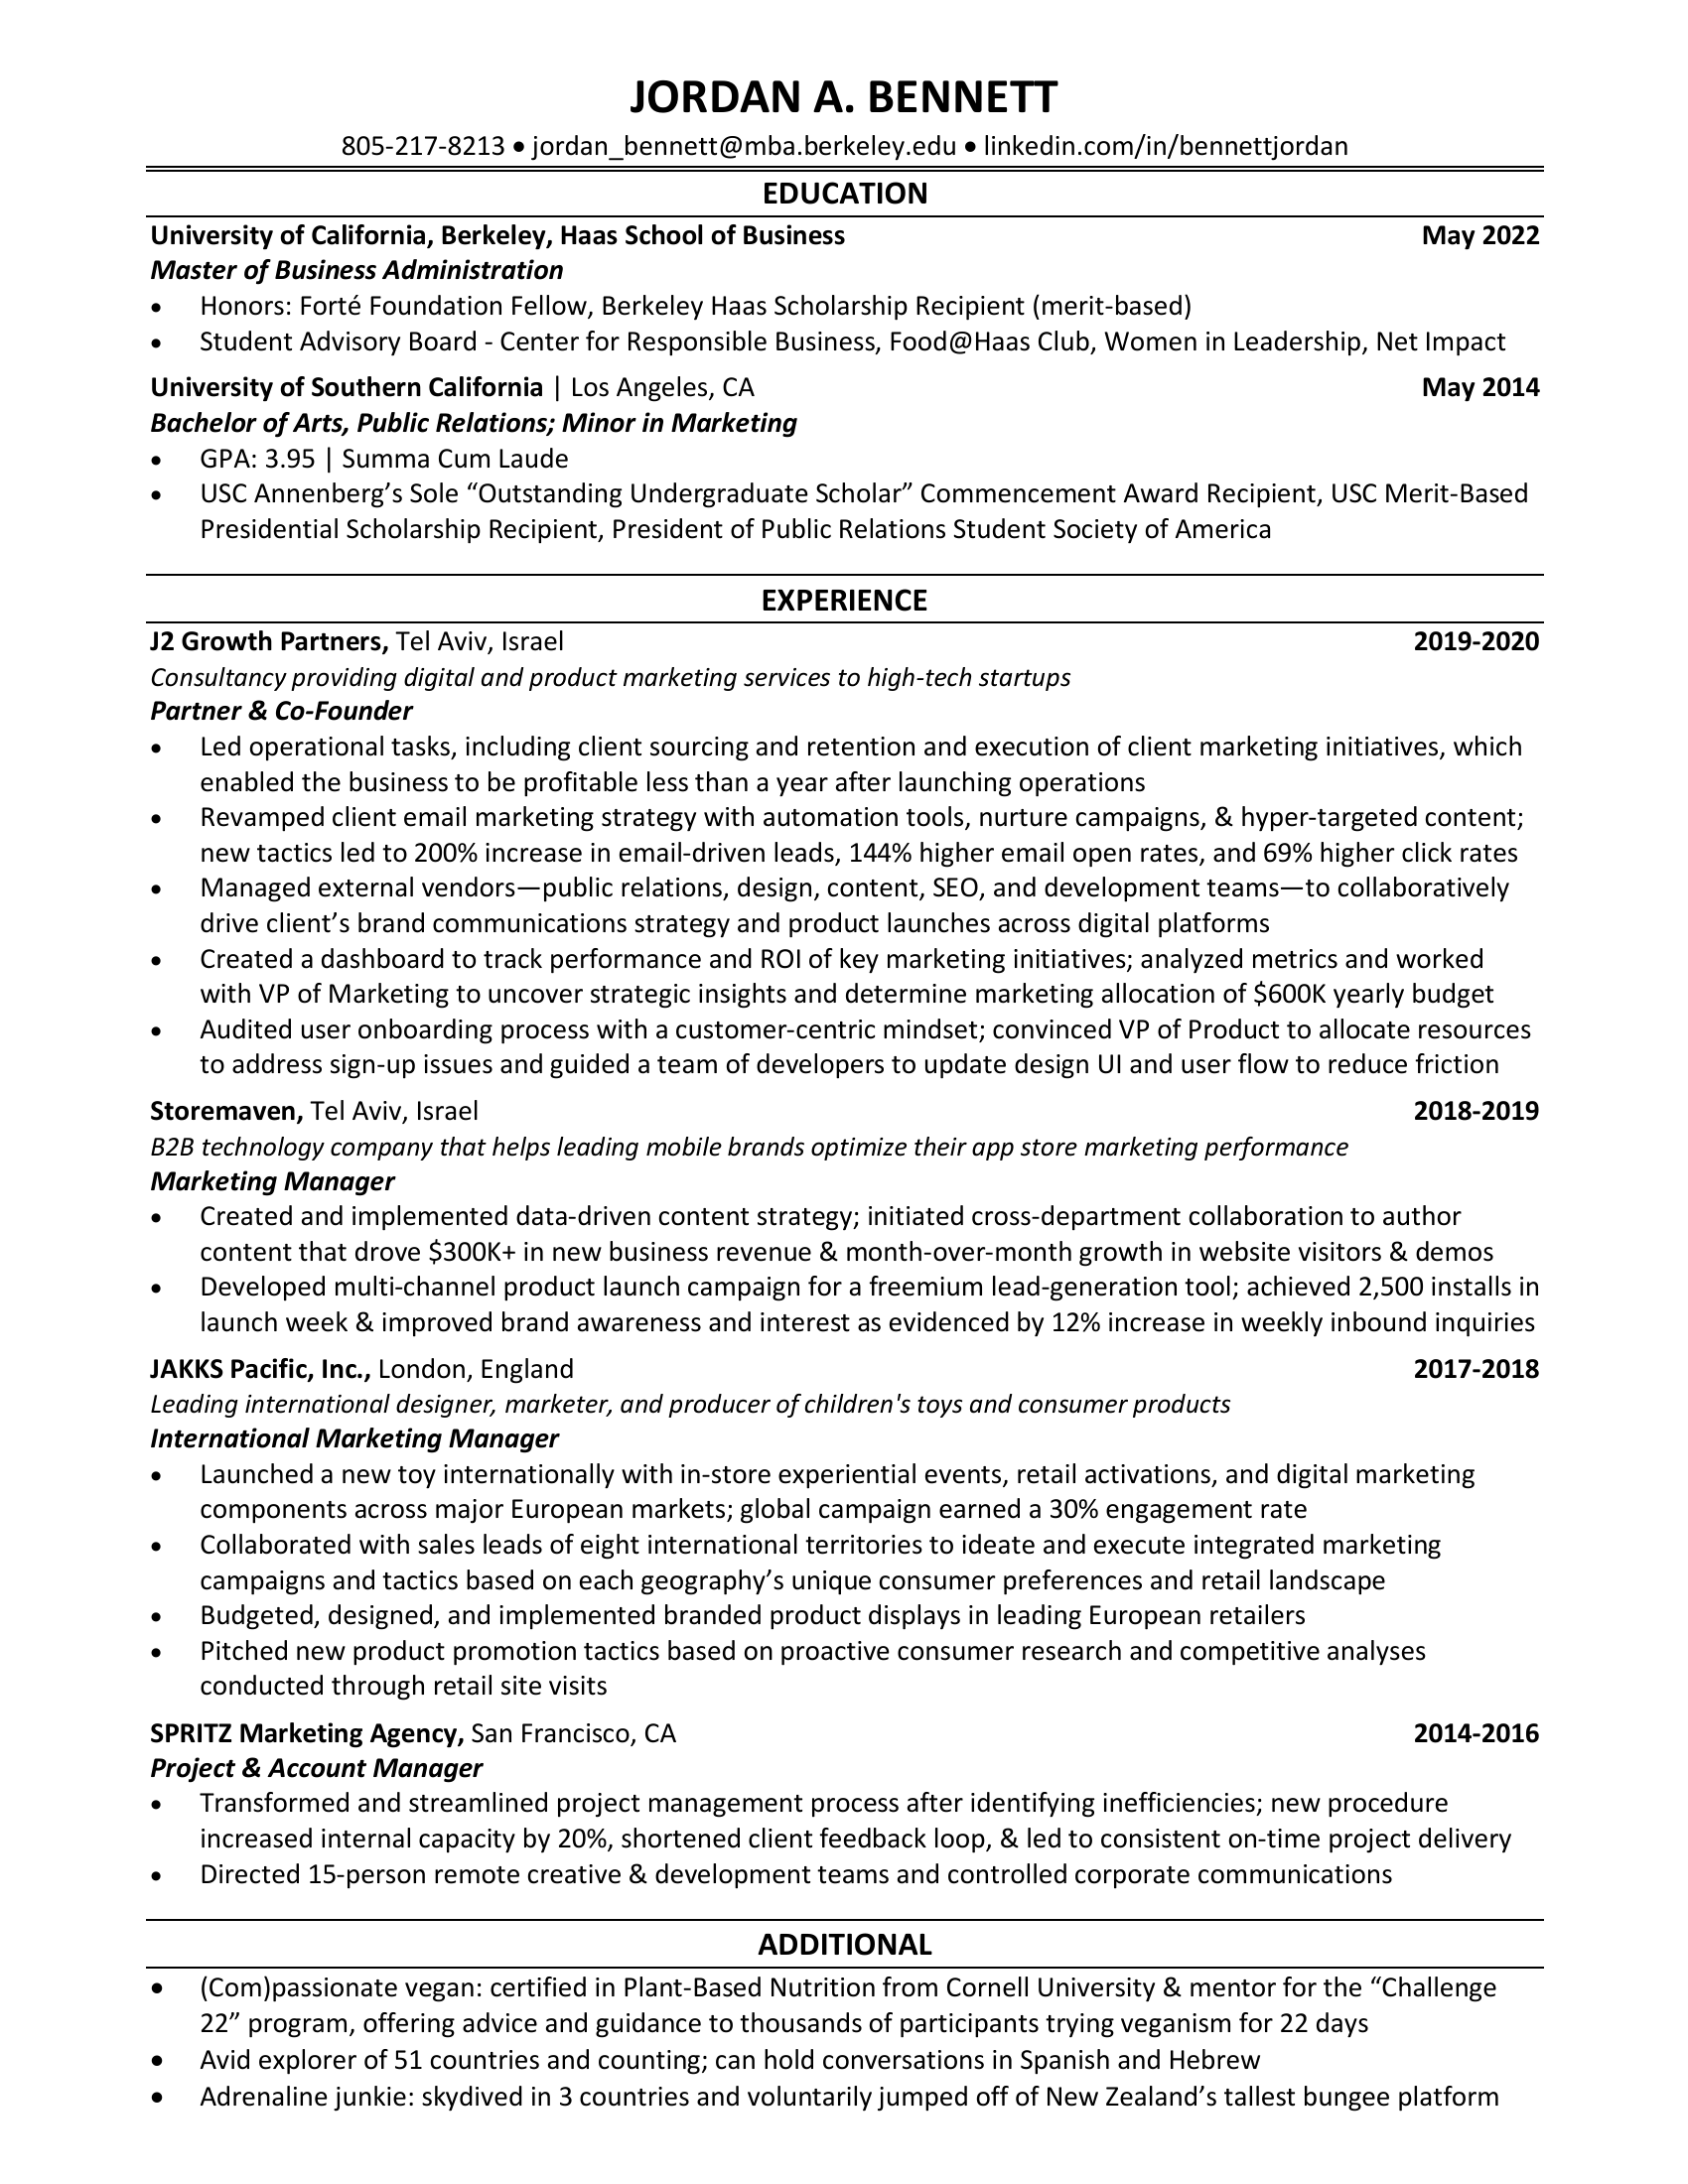

In [12]:
display(images[21])

Extract bounds from resume image.

In [13]:
#reader object-> pil image to list
bounds = reader.readtext(np.array(images[21]),min_size=0,slope_ths=0.2,ycenter_ths=0.7,height_ths=0.6,width_ths=0.8)

Get boxes for the headers of the resume.

In [21]:
box = createBoxes(bounds)
box

[([[766, 180], [938, 180], [938, 212], [766, 212]],
  'EDUCATION',
  0.9742440529069134),
 ([[766, 590], [938, 590], [938, 622], [766, 622]],
  'EXPERIENCE',
  0.8535212971460122),
 ([[762, 1944], [944, 1944], [944, 1976], [762, 1976]],
  'ADDITIONAL',
  0.6134258811979144),
 ([[199, 2093], [1515, 2093], [1515, 2135], [199, 2135]],
  "Adrenaline junkie: skydived in 3 countries and voluntarily jumped off of New Zealand's tallest bungee platform",
  0.9133297927028329)]

Determine if the resume is column-based or row-based and get boxes for each section of the resume

In [22]:
for i in range(2, len(box)):
    if((box[i-1][0][0][0] >= 500) != (box[i-2][0][0][0] >=500)):
        columns = True
        break
    else:
        columns = False

if(columns):
    new_bounds= createColumnBounds(box)
else:
    new_bounds=createNormalBounds(box)
new_bounds = list(map(lambda x: ([x[0][3], x[0][2],x[0][1],x[0][0]],x[1]) if x[0][3]!=[0,0] else x, new_bounds))
properNameBounds= giveProperNames(new_bounds)

Draw annotated boxes on the resumes

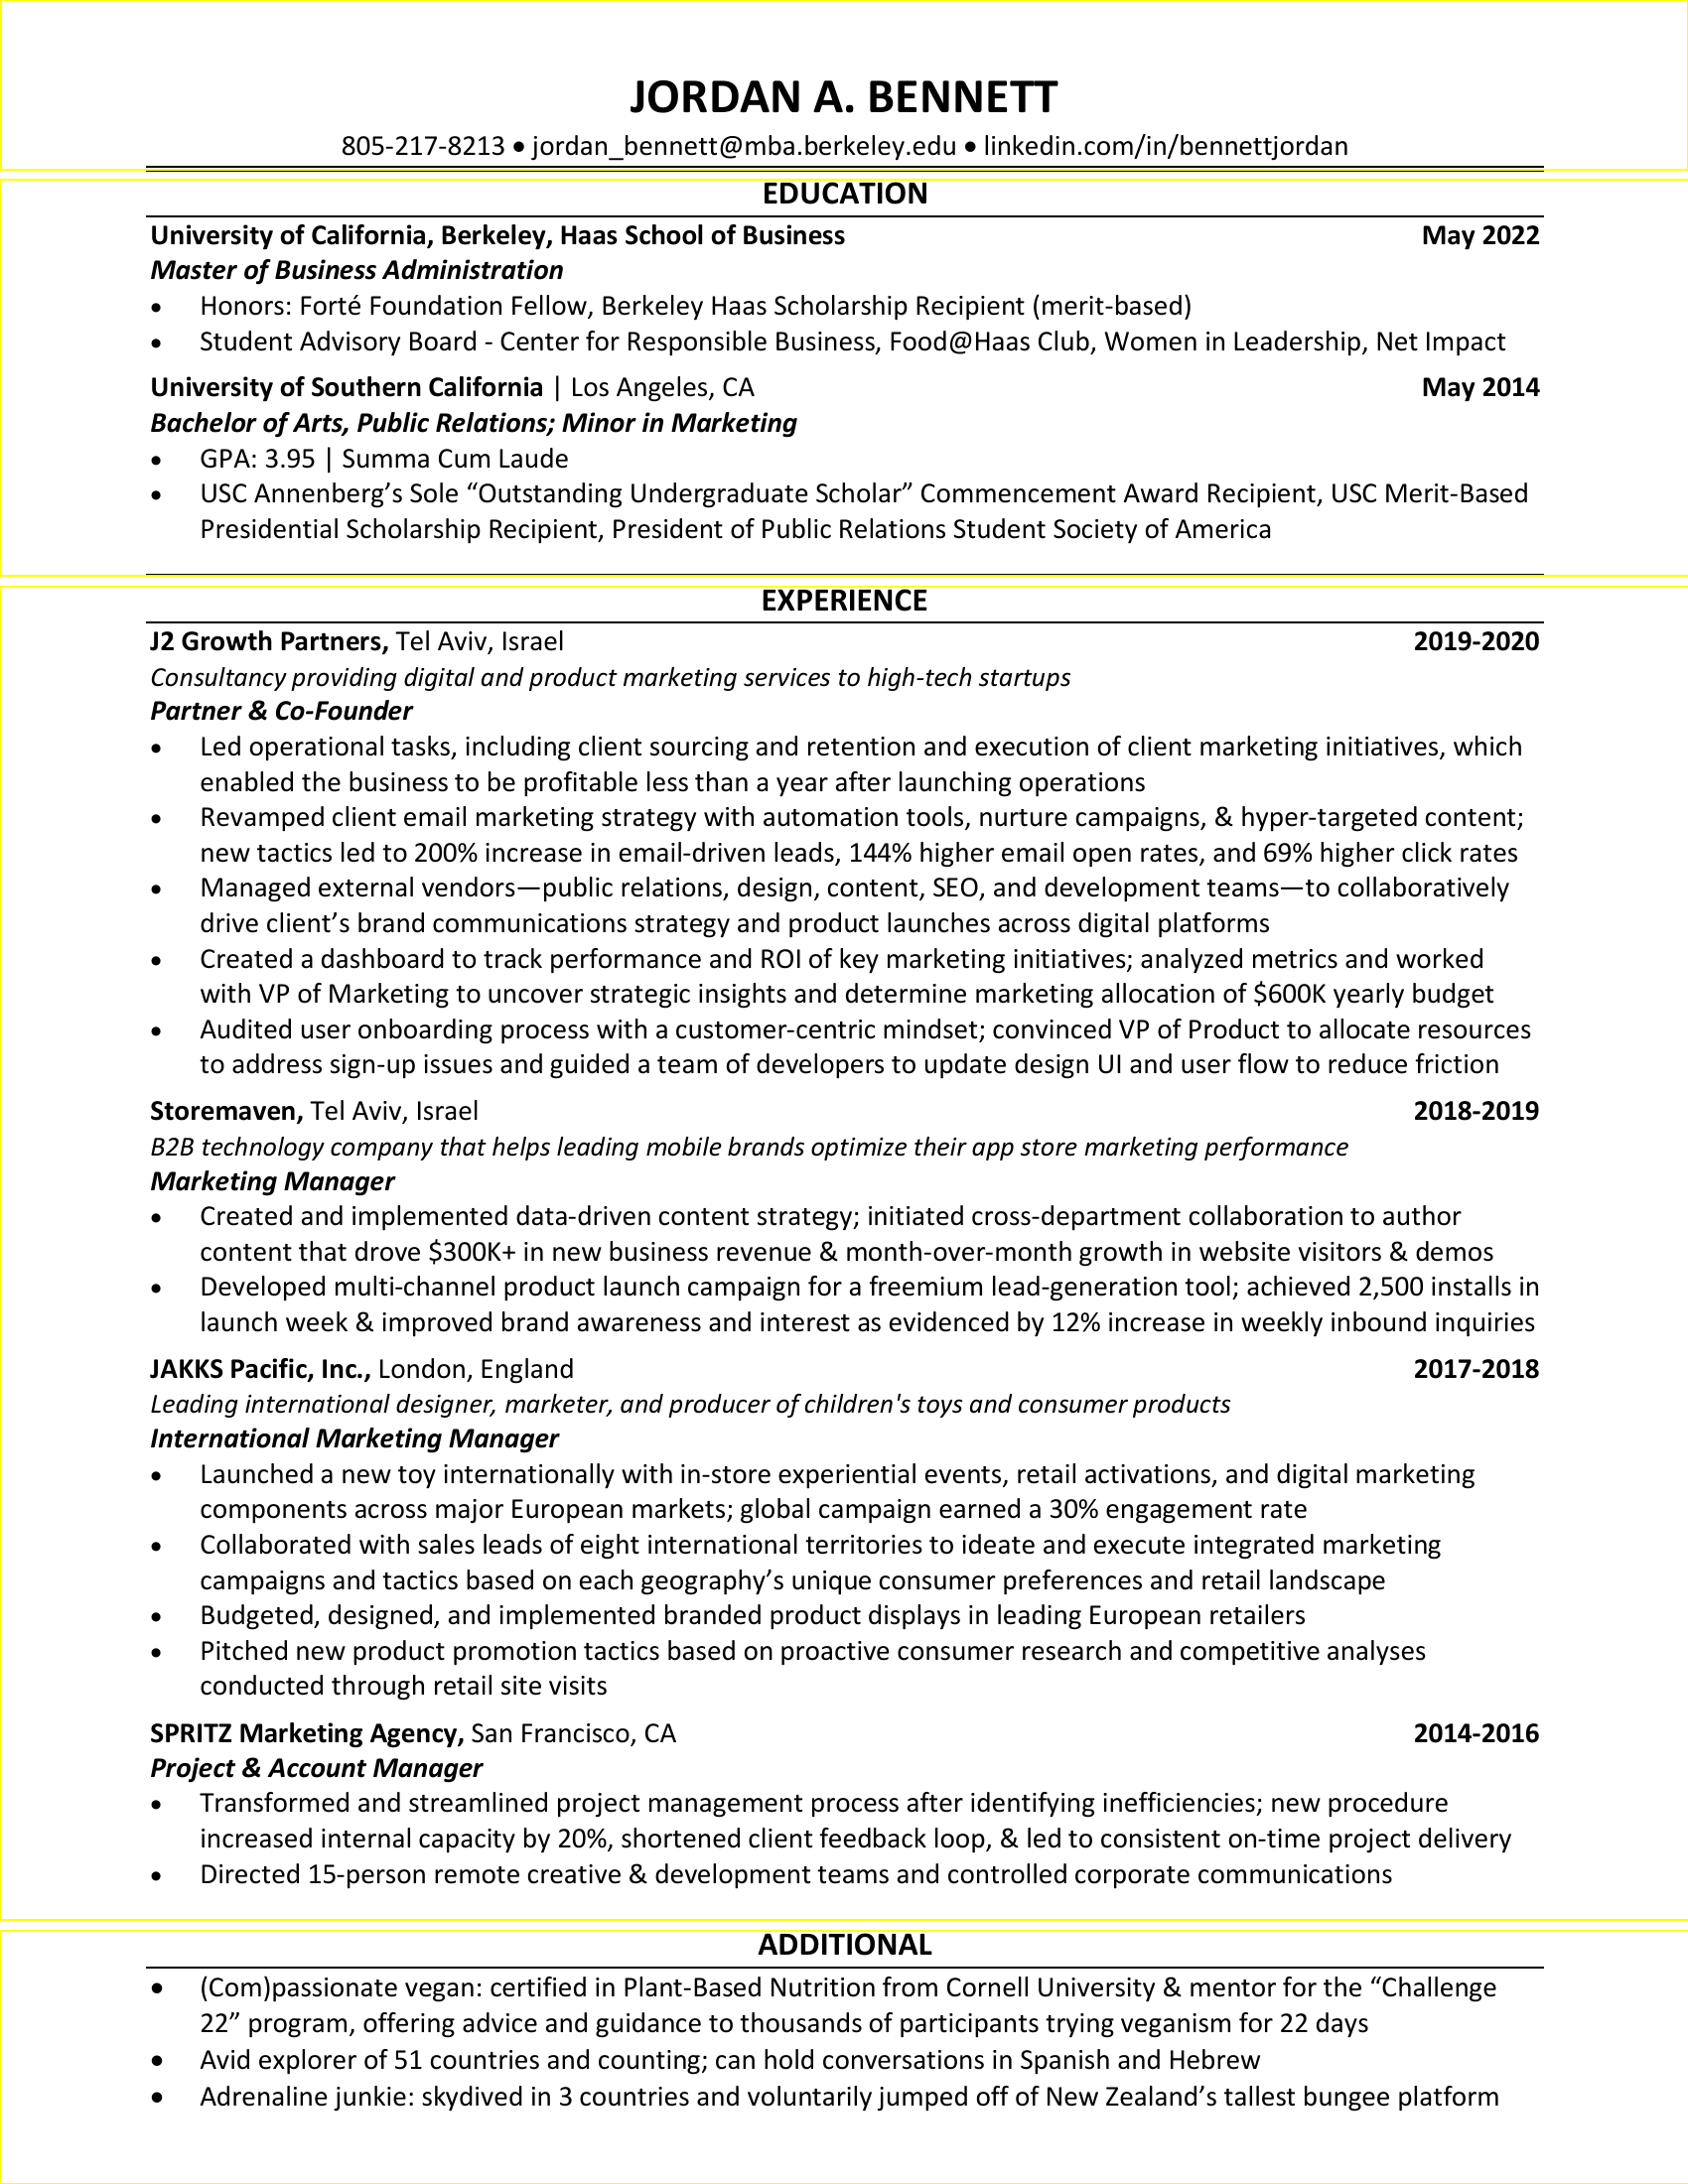

In [25]:
draw_boxes(images[21],properNameBounds)

Write XML file for the annotated resume to use in training the model

In [69]:
write_xml(images[len(images)-21], properNameBounds, 'Test29',"/Users/daniellichter/Desktop/Macaulay:City/Fall 2021/Machine Learning/HaasXMLs")

## Annotate all resumes in a Resume Book

Ensure that the paths are correct for where the resumes will be saved. A copy of the annotated resume is saved as well to help see if the annotations were done correctly.

In [47]:
image_path = "/Users/daniellichter/Desktop/Macaulay:City/Fall 2021/Machine Learning/StanfordResumes"
image_name = 'D000'
resume = images[1]
im1 = resume.save(f"{image_path}/{image_name}.jpg")

In [ ]:
save = []
for x in range(len(images)-50, len(images)): #Change range to desired range of resumes
        image_path = "/Users/daniellichter/Desktop/Macaulay:City/Fall 2021/Machine Learning/HaasResumes"
        image_name = 'Test' + str(x-(len(images)-50))
        resume = images[x]
        im1 = resume.save(f"{image_path}/{image_name}.jpg")
        bounds = reader.readtext(np.array(images[x]),min_size=0,slope_ths=0.2,ycenter_ths=0.7,height_ths=0.6,width_ths=0.8)
        save.append([image_name, bounds])
        box = createBoxes(bounds)
        for i in range(2, len(box)):
            if((box[i-1][0][0][0] >= 500) != (box[i-2][0][0][0] >=500)):
                columns = True
                break
            else:
                columns = False      
        if(columns):
            new_bounds= createColumnBounds(box)
        else:
            new_bounds=createNormalBounds(box)
        
        new_bounds = list(map(lambda x: ([x[0][3], x[0][2],x[0][1],x[0][0]],x[1]) if x[0][3]!=[0,0] else x, new_bounds))
        properNameBounds= giveProperNames(new_bounds)
        draw_boxes(images[x], properNameBounds)
        write_xml(images[x], properNameBounds, image_name,"/Users/daniellichter/Desktop/Macaulay:City/Fall 2021/Machine Learning/HaasXMLs")
        annotated_path = "/Users/daniellichter/Desktop/Macaulay:City/Fall 2021/Machine Learning/HaasAnnotated"
        im2 = resume.save(f"{annotated_path}/{image_name}.jpg")
        
        
        
        
        
        